In [1]:
#Importing required Python packages 
import matplotlib.pylab as plt 
import numpy as np 
import torch
import torch.nn as nn
import torch.nn.functional as F

%matplotlib tk

In [2]:
#Define a simple range of values for x and reshape so sklearn likes it.
x = np.linspace(0,1,200)
# noise = np.random.normal(0,0.02, x.shape)
# x = x + noise
y= (2 * np.sin(10*x) + np.cos(20 * x - 3) + 3 * np.log(10*x + 0.5) - 4)/6.
noise = np.random.normal(0,0.1, x.shape)
y = y + noise
x = x[:, np.newaxis]
y = y[:, np.newaxis]

In [3]:
xy  = np.c_[x,y]

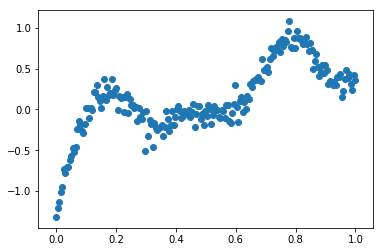

In [4]:
%matplotlib inline
plt.scatter(x, y)

In [16]:
# define parameters
hid1 = 6
init = nn.init.xavier_normal_
W1 = torch.empty(1, hid1, requires_grad=True)
b1 = torch.zeros(hid1, requires_grad=True)
init(W1)
W2 = torch.empty(hid1, 1, requires_grad=True)
b2 = torch.zeros(1, requires_grad=True)
init(W2)

params = [W1, b1, W2, b2]
optimizer = torch.optim.Adam(params, lr=0.03)

dt = torch.float32
X_data = torch.from_numpy(x).type(dt)
Y_data = torch.from_numpy(y).type(dt)

In [18]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

plt.ion()
fig.show()
fig.canvas.draw()

for step in range(1000000):
    z1 = X_data.mm(W1) + b1
    a1 = z1.clamp(min=0)

    end_points = -b1 / W1[0]

    # find the indices of the lowest to highest values of end point
    sorted_ep, indices = torch.sort(end_points)

    sorted_lp = torch.cat((sorted_ep[1:], torch.tensor([1.])))  # some large number, chosen low to fit on the plot(graph)

    _, reverse_indices = torch.sort(indices)

    limit_points = sorted_lp[reverse_indices]

    final_lp = limit_points * W1[0] + b1
    a1 = torch.min(a1, final_lp)

    pred = a1.mm(W2) + b2

    optimizer.zero_grad()
    loss = F.mse_loss(pred, Y_data)
    loss.backward()
    optimizer.step()

    if step % 1000 == 0:

        print('_______________________')
        print("epoch", step)

        print("Weight 1", '\n', W1.data)
        print("Biases 1", '\n', b1.data)
        print("Weight 2", '\n', W2.data)
        print("Biases 2", '\n', b2.data)
        # print("Linearity\n", v1.eval())

        losses = float(loss)
        print("Loss", losses)

        # print('sorted ', sess.run(a1z, feed_dict={xs: x_data, ys: y_data}))

        ax.clear()
        ax.scatter(x, y, marker='.', c='g')
        ax.plot(x, pred.data.numpy(), 'r', lw=5)
        for out in a1.data.numpy().T:
            ax.plot(x, out, 'b', lw=2)

        fig.canvas.draw()
        plt.pause(0.001)
        print("\n")
        if losses < 0.0025:
            plt.pause(50)
            break

_______________________
epoch 0
Weight 1 
 tensor([[ 3.6066,  1.4197, -0.2607, -0.6905,  2.7888,  1.2304]])
Biases 1 
 tensor([-0.5975, -0.3308,  0.0949, -0.0949,  0.0964, -0.5209])
Weight 2 
 tensor([[-3.4979],
        [ 2.5141],
        [ 0.7643],
        [ 0.0155],
        [ 3.8057],
        [ 0.6269]])
Biases 2 
 tensor([-1.0550])
Loss 10.244017601013184


_______________________
epoch 1000
Weight 1 
 tensor([[ 1.6315,  2.0466, -1.8996, -1.7737,  2.5476,  1.9791]])
Biases 1 
 tensor([-1.9030e+00,  3.5009e-01,  2.4193e-01,  1.2940e+00,  8.0091e-06,
        -1.1490e+00])
Weight 2 
 tensor([[-1.2054],
        [ 1.5634],
        [-0.0756],
        [ 0.6384],
        [ 2.8194],
        [ 2.1147]])
Biases 2 
 tensor([-1.3814])
Loss 0.03240180388092995


_______________________
epoch 2000
Weight 1 
 tensor([[ 1.6388,  2.0466, -1.9244, -1.7924,  3.0739,  2.0214]])
Biases 1 
 tensor([-1.8991e+00,  3.4421e-01,  2.0477e-01,  1.2904e+00,  6.9809e-05,
        -1.1955e+00])
Weight 2 
 tensor([[-

_______________________
epoch 21000
Weight 1 
 tensor([[ 2.3927,  4.6718, -2.3926, -3.2010,  4.3125,  2.3002]])
Biases 1 
 tensor([-1.8476e+00, -3.3709e-01,  3.8962e-01,  3.4992e-01,  1.1785e-03,
        -1.3940e+00])
Weight 2 
 tensor([[-1.3213],
        [ 1.4649],
        [-0.4049],
        [-0.9544],
        [ 3.0701],
        [ 2.4857]])
Biases 2 
 tensor([-1.8251])
Loss 0.017505677416920662


_______________________
epoch 22000
Weight 1 
 tensor([[ 2.4050,  4.5833, -2.4251, -3.2267,  4.3451,  2.3094]])
Biases 1 
 tensor([-1.8583e+00, -3.4022e-01,  3.9391e-01,  3.6817e-01,  1.1339e-03,
        -1.3978e+00])
Weight 2 
 tensor([[-1.3177],
        [ 1.2706],
        [-0.4354],
        [-0.9436],
        [ 3.0154],
        [ 2.4467]])
Biases 2 
 tensor([-1.8428])
Loss 0.017506739124655724


_______________________
epoch 23000
Weight 1 
 tensor([[ 2.4159,  4.6385, -2.4394, -3.2485,  4.4034,  2.3224]])
Biases 1 
 tensor([-1.8655e+00, -3.4312e-01,  3.9400e-01,  3.7419e-01,  7.6147e-04,
  

_______________________
epoch 42000
Weight 1 
 tensor([[ 2.6283,  5.9466, -2.5705, -4.2710,  5.1596,  2.5072]])
Biases 1 
 tensor([-2.0295e+00, -4.4075e-01,  3.3655e-01,  4.9361e-01,  1.7932e-03,
        -1.5199e+00])
Weight 2 
 tensor([[-1.2029],
        [ 0.9250],
        [-0.7964],
        [-0.5751],
        [ 2.5718],
        [ 2.2805]])
Biases 2 
 tensor([-2.2449])
Loss 0.017497584223747253


_______________________
epoch 43000
Weight 1 
 tensor([[ 2.6413,  6.0081, -2.5660, -4.3217,  5.1920,  2.5116]])
Biases 1 
 tensor([-2.0349e+00, -4.4297e-01,  3.3044e-01,  4.9525e-01,  1.0823e-03,
        -1.5252e+00])
Weight 2 
 tensor([[-1.1956],
        [ 0.9145],
        [-0.8092],
        [-0.5594],
        [ 2.5483],
        [ 2.2626]])
Biases 2 
 tensor([-2.2659])
Loss 0.01877187192440033


_______________________
epoch 44000
Weight 1 
 tensor([[ 2.6517,  6.0652, -2.5646, -4.3668,  5.2323,  2.5209]])
Biases 1 
 tensor([-2.0430e+00, -4.4689e-01,  3.2676e-01,  5.0059e-01, -3.8040e-04,
   

_______________________
epoch 63000
Weight 1 
 tensor([[ 2.8444,  7.0739, -2.6323, -4.8420,  5.9246,  2.6563]])
Biases 1 
 tensor([-2.1968, -0.5245,  0.4124,  0.5597,  0.0027, -1.6099])
Weight 2 
 tensor([[-1.1112],
        [ 0.7781],
        [-1.0682],
        [-0.6827],
        [ 2.2422],
        [ 2.1529]])
Biases 2 
 tensor([-2.6350])
Loss 0.017502356320619583


_______________________
epoch 64000
Weight 1 
 tensor([[ 2.8547,  7.1227, -2.6371, -4.8802,  5.9584,  2.6612]])
Biases 1 
 tensor([-2.2043, -0.5278,  0.4052,  0.5640,  0.0028, -1.6132])
Weight 2 
 tensor([[-1.1075],
        [ 0.7723],
        [-1.0833],
        [-0.6678],
        [ 2.2277],
        [ 2.1485]])
Biases 2 
 tensor([-2.6530])
Loss 0.017497580498456955


_______________________
epoch 65000
Weight 1 
 tensor([[ 2.8641,  7.1700, -2.6413, -4.9230,  5.9877,  2.6620]])
Biases 1 
 tensor([-2.2130, -0.5334,  0.3980,  0.5683,  0.0049, -1.6114])
Weight 2 
 tensor([[-1.1011],
        [ 0.7687],
        [-1.0986],
        

_______________________
epoch 85000
Weight 1 
 tensor([[ 3.0575,  8.0239, -2.5875, -5.4091,  6.6542,  2.7783]])
Biases 1 
 tensor([-2.3607, -0.5940,  0.4184,  0.6248,  0.0033, -1.6844])
Weight 2 
 tensor([[-1.0342],
        [ 0.6862],
        [-1.1771],
        [-0.7195],
        [ 1.9968],
        [ 2.0577]])
Biases 2 
 tensor([-2.7714])
Loss 0.017499195411801338


_______________________
epoch 86000
Weight 1 
 tensor([[ 3.0669,  8.0630, -2.5901, -5.3876,  6.6834,  2.7842]])
Biases 1 
 tensor([-2.3680, -0.5978,  0.4048,  0.6224,  0.0031, -1.6878])
Weight 2 
 tensor([[-1.0309],
        [ 0.6829],
        [-1.1858],
        [-0.6992],
        [ 1.9842],
        [ 2.0537]])
Biases 2 
 tensor([-2.7708])
Loss 0.017497755587100983


_______________________
epoch 87000
Weight 1 
 tensor([[ 3.0772,  8.1028, -2.5873, -5.3861,  6.7115,  2.7884]])
Biases 1 
 tensor([-2.3734e+00, -5.9965e-01,  3.9416e-01,  6.1971e-01,  1.7028e-03,
        -1.6897e+00])
Weight 2 
 tensor([[-1.0260],
        [ 0.68

_______________________
epoch 108000
Weight 1 
 tensor([[ 3.4527,  7.4032, -3.6575, -4.9056,  7.1818,  3.1322]])
Biases 1 
 tensor([-2.6728, -1.0033,  0.4913,  1.4552,  0.3716, -1.8247])
Weight 2 
 tensor([[-0.9089],
        [-0.3195],
        [-1.4988],
        [-0.1940],
        [ 1.4805],
        [ 1.6960]])
Biases 2 
 tensor([-1.9742])
Loss 0.011621390469372272


_______________________
epoch 109000
Weight 1 
 tensor([[ 3.4620,  7.4132, -3.7096, -4.9020,  7.1834,  3.1388]])
Biases 1 
 tensor([-2.6794, -1.0050,  0.4960,  1.4598,  0.3560, -1.8282])
Weight 2 
 tensor([[-0.9109],
        [-0.3159],
        [-1.5379],
        [-0.2064],
        [ 1.4752],
        [ 1.6754]])
Biases 2 
 tensor([-1.9736])
Loss 0.011936151422560215


_______________________
epoch 110000
Weight 1 
 tensor([[ 3.4698,  7.4209, -3.7659, -4.9025,  7.1959,  3.1502]])
Biases 1 
 tensor([-2.6860, -1.0065,  0.5061,  1.4560,  0.3431, -1.8351])
Weight 2 
 tensor([[-0.9045],
        [-0.3188],
        [-1.6240],
     

_______________________
epoch 130000
Weight 1 
 tensor([[ 3.6715,  7.5922, -4.0993, -5.5315,  7.5542,  3.2445]])
Biases 1 
 tensor([-2.8345, -0.8469,  0.4082,  0.6430,  0.0045, -1.9655])
Weight 2 
 tensor([[-0.8580],
        [ 0.1337],
        [-0.8557],
        [-0.4392],
        [ 1.5368],
        [ 1.7472]])
Biases 2 
 tensor([-2.4227])
Loss 0.017958076670765877


_______________________
epoch 131000
Weight 1 
 tensor([[ 3.6783,  7.5982, -4.1330, -5.5006,  7.5785,  3.2517]])
Biases 1 
 tensor([-2.8401e+00, -8.5146e-01,  4.1075e-01,  6.2915e-01,  2.6050e-03,
        -1.9713e+00])
Weight 2 
 tensor([[-0.8597],
        [ 0.2080],
        [-0.9172],
        [-0.4413],
        [ 1.5430],
        [ 1.7583]])
Biases 2 
 tensor([-2.4305])
Loss 0.017698761075735092


_______________________
epoch 132000
Weight 1 
 tensor([[ 3.6864,  7.6154, -4.1858, -5.4595,  7.5957,  3.2563]])
Biases 1 
 tensor([-2.8465e+00, -8.5734e-01,  4.1620e-01,  6.2175e-01,  1.9008e-03,
        -1.9740e+00])
Weight 2 

_______________________
epoch 152000
Weight 1 
 tensor([[ 3.8789,  8.1887, -4.9995, -4.6635,  8.1888,  3.4334]])
Biases 1 
 tensor([-3.0017e+00, -5.7989e-01,  5.3962e-01,  1.0432e+00,  2.0921e-04,
        -2.0523e+00])
Weight 2 
 tensor([[-0.8089],
        [ 0.8762],
        [-0.8717],
        [-0.5073],
        [ 1.6235],
        [ 1.5618]])
Biases 2 
 tensor([-2.6202])
Loss 0.017569096758961678


_______________________
epoch 153000
Weight 1 
 tensor([[ 3.8789,  8.1866, -4.9995, -4.6635,  8.1889,  3.4334]])
Biases 1 
 tensor([-3.0017e+00, -5.8059e-01,  5.4002e-01,  1.0432e+00,  2.7333e-04,
        -2.0523e+00])
Weight 2 
 tensor([[-0.8089],
        [ 0.8724],
        [-0.8718],
        [-0.5074],
        [ 1.6236],
        [ 1.5618]])
Biases 2 
 tensor([-2.6201])
Loss 0.01756908744573593


_______________________
epoch 154000
Weight 1 
 tensor([[ 3.8897,  8.1872, -4.9953, -4.6565,  8.1880,  3.4601]])
Biases 1 
 tensor([-3.0011e+00, -5.8025e-01,  5.4296e-01,  1.0420e+00,  2.8230e-03,


_______________________
epoch 173000
Weight 1 
 tensor([[ 4.0207,  8.8863, -5.0035, -4.2613,  8.6414,  3.4915]])
Biases 1 
 tensor([-3.1047e+00, -6.3214e-01,  5.4381e-01,  8.4929e-01,  2.5064e-03,
        -2.1160e+00])
Weight 2 
 tensor([[-0.7864],
        [ 0.7970],
        [-0.7435],
        [-0.7049],
        [ 1.5381],
        [ 1.6376]])
Biases 2 
 tensor([-2.7931])
Loss 0.017505299299955368


_______________________
epoch 174000
Weight 1 
 tensor([[ 4.0278,  8.9258, -5.0317, -4.2384,  8.6650,  3.4923]])
Biases 1 
 tensor([-3.1101e+00, -6.3533e-01,  5.4697e-01,  8.3771e-01,  1.8866e-03,
        -2.1165e+00])
Weight 2 
 tensor([[-0.7850],
        [ 0.7925],
        [-0.7392],
        [-0.7105],
        [ 1.5337],
        [ 1.6372]])
Biases 2 
 tensor([-2.7938])
Loss 0.017505304887890816


_______________________
epoch 175000
Weight 1 
 tensor([[ 4.0347,  8.9581, -5.0604, -4.2147,  8.6843,  3.4936]])
Biases 1 
 tensor([-3.1156, -0.6412,  0.5501,  0.8263,  0.0042, -2.1170])
Weight 2 

_______________________
epoch 194000
Weight 1 
 tensor([[ 4.1580,  9.6142, -5.6077, -3.8340,  9.0904,  3.5132]])
Biases 1 
 tensor([-3.2107e+00, -6.8608e-01,  6.1001e-01,  7.0162e-01,  2.9533e-03,
        -2.1292e+00])
Weight 2 
 tensor([[-0.7604],
        [ 0.7323],
        [-0.6768],
        [-0.7944],
        [ 1.4607],
        [ 1.6275]])
Biases 2 
 tensor([-2.8044])
Loss 0.017505329102277756


_______________________
epoch 195000
Weight 1 
 tensor([[ 4.1642,  9.6458, -5.6300, -3.8170,  9.1103,  3.5143]])
Biases 1 
 tensor([-3.2155e+00, -6.8792e-01,  6.1235e-01,  6.9614e-01,  2.6120e-03,
        -2.1298e+00])
Weight 2 
 tensor([[-0.7593],
        [ 0.7305],
        [-0.6742],
        [-0.7986],
        [ 1.4579],
        [ 1.6270]])
Biases 2 
 tensor([-2.8048])
Loss 0.01750532165169716


_______________________
epoch 196000
Weight 1 
 tensor([[ 4.1707,  9.6738, -5.6515, -3.8016,  9.1295,  3.5164]])
Biases 1 
 tensor([-3.2205e+00, -6.9037e-01,  6.1482e-01,  6.9058e-01,  1.6598e-03,


_______________________
epoch 216000
Weight 1 
 tensor([[ 4.2953, 10.2308, -6.1417, -3.4808,  9.5138,  3.5405]])
Biases 1 
 tensor([-3.3167, -0.7299,  0.6679,  0.4697,  0.0040, -2.1457])
Weight 2 
 tensor([[-0.7361],
        [ 0.6891],
        [-0.5447],
        [-0.8827],
        [ 1.3955],
        [ 1.6149]])
Biases 2 
 tensor([-2.7706])
Loss 0.017505330964922905


_______________________
epoch 217000
Weight 1 
 tensor([[ 4.3010, 10.2596, -6.1721, -3.4671,  9.5318,  3.5429]])
Biases 1 
 tensor([-3.3211e+00, -7.3008e-01,  6.7096e-01,  4.5484e-01,  2.8158e-03,
        -2.1472e+00])
Weight 2 
 tensor([[-0.7351],
        [ 0.6894],
        [-0.5350],
        [-0.8865],
        [ 1.3945],
        [ 1.6139]])
Biases 2 
 tensor([-2.7680])
Loss 0.017505303025245667


_______________________
epoch 218000
Weight 1 
 tensor([[ 4.3079, 10.2781, -6.2095, -3.4491,  9.5473,  3.5450]])
Biases 1 
 tensor([-3.3259e+00, -7.3477e-01,  6.7465e-01,  4.3965e-01,  2.8312e-03,
        -2.1481e+00])
Weight 2 

TclError: this isn't a Tk application